Yahoo finance (n)

Proszę wstawić print screen z np. jupyter notebooka, gdzie:

- będą widoczne 2 wykresy ze średnią ruchomą (pandas, altair)

- będzie widoczny kod, który wygenerował wykresy.


Nazwa pliku (bez polskich znaków):

Nazwisko_Imie_yahoo_niestacj.jpg

Dane:
    
https://finance.yahoo.com/quote/CSV/history/?guce_referrer=aHR0cHM6Ly93d3cuZ29vZ2xlLmNvbS8&guce_referrer_sig=AQAAAJjgOLcqSa79X2NVcDfaAsiL9BAHg5RvrFg6uir9MoKK8kw1oCE7Io1rINBuyWaJzgkx4TiRiOL_UMQKHk9Lp2Ne9IZ7hwh-3ettI5wsQEvlI2guv04Y0DrmkdAYNKm_baNDrq-DX0kN7r07wdmeKavlvqjoWZWgGPyncARRyqtG&guccounter=2


In [403]:
import pandas as pd
import altair as alt
import seaborn as sns
import matplotlib.pyplot as plt
from vega_datasets import data

In [404]:
def get_data_head(path="houses_data.csv"):
    """
    Reads csv file, assigns it to 'my_data' and returns head(). 
    'my_data' is a global variable. 
    'path' is a path for csv file. Default = houses_data.csv
    """
    
    global my_data
    my_data = pd.read_csv(path)
    return display(my_data.head())

In [405]:
get_data_head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


# Pandas

In [406]:
def smaller_df(data=my_data, x="Date", y="Price"):
    """
    Slices dataframe to x, y, values.
    Calculates rolling mean for y value.
    Returns dataframe with x as index, y and rolling mean of y.
    """
    global small_df
    
    # making new df based on my_data with date as index
    small_df = pd.DataFrame()
    small_df[x] = data[x]
    small_df[y] = data[y]
    
    # cuts outliers before rolling mean
    
    # calculation of rolling mean with windows = 10
    small_df["Rolling"] = data[y].rolling(10).mean()
    small_df.set_index(x, inplace=True)
    return small_df

In [407]:
smaller_df(y="Price")

,Price,Rolling
Date,,
3/12/2016,1480000.0,NaN
4/02/2016,1035000.0,NaN
4/03/2017,1465000.0,NaN
4/03/2017,850000.0,NaN
4/06/2016,1600000.0,NaN
...,...,...
26/08/2017,1245000.0,1025200.0
26/08/2017,1031000.0,1003300.0
26/08/2017,1170000.0,988700.0


In [408]:
def plot_small_df(data=small_df):
    """ 
    Gets data in df form. Default: small_df.
    Plots red scatter plot with x = index, y= first column of df.
    Plots green and blue line plots with x = index, y= first and second column of df.
    """
    plt.figure(figsize=((12,6)))
    
    sns.scatterplot(x=data.index, y=data.iloc[:,0], color="red", label=small_df.columns[0])
    sns.lineplot(x=data.index, y=data.iloc[:,1], color="blue", label=small_df.columns[1])
    
    plt.xticks(rotation=90)
    plt.grid();

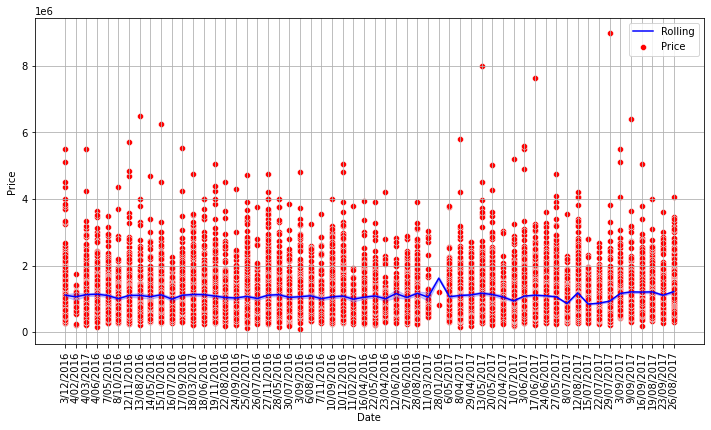

In [409]:
plot_small_df()

# Altair

In [410]:
source = data.seattle_weather()
source

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9,fog
1457,2015-12-28,1.5,5.0,1.7,1.3,fog
1458,2015-12-29,0.0,7.2,0.6,2.6,fog
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun


In [411]:
line = alt.Chart(source).mark_line(
    color='red',
    size=3
).transform_window(
    rolling_mean='mean(temp_max)',
    frame=[-15, 15]
).encode(
    x='date:T',
    y='rolling_mean:Q'
)

points = alt.Chart(source).mark_point().encode(
    x='date:T',
    y=alt.Y('temp_max:Q',
            axis=alt.Axis(title='Max Temp'))
)

points + line

alt.LayerChart(...)

In [412]:
penguins = sns.load_dataset("penguins")
penguins.columns

Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

In [413]:
source = penguins
x = 'bill_length_mm'
y = 'body_mass_g'

In [414]:
degree_list = [1, 3, 5]

base = alt.Chart(source).mark_circle(size=50).encode(
    alt.X(x), alt.Y(y), color='species',
    tooltip=['body_mass_g', 'sex', 'island']
)

polynomial_fit = [
    base.transform_regression(
        x, y, method="poly", order=order, as_=[x, str(order)]
    )
    .mark_line()
    .transform_fold([str(order)], as_=["degree", y])
    .encode(alt.Color("degree:N"))
    for order in degree_list
]

base.save('base.html')
alt.layer(base, *polynomial_fit).interactive()

alt.LayerChart(...)